## Clustering

### IRIS dataset

In [50]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, KMeans



In [51]:
df = pd.read_csv('iris/IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

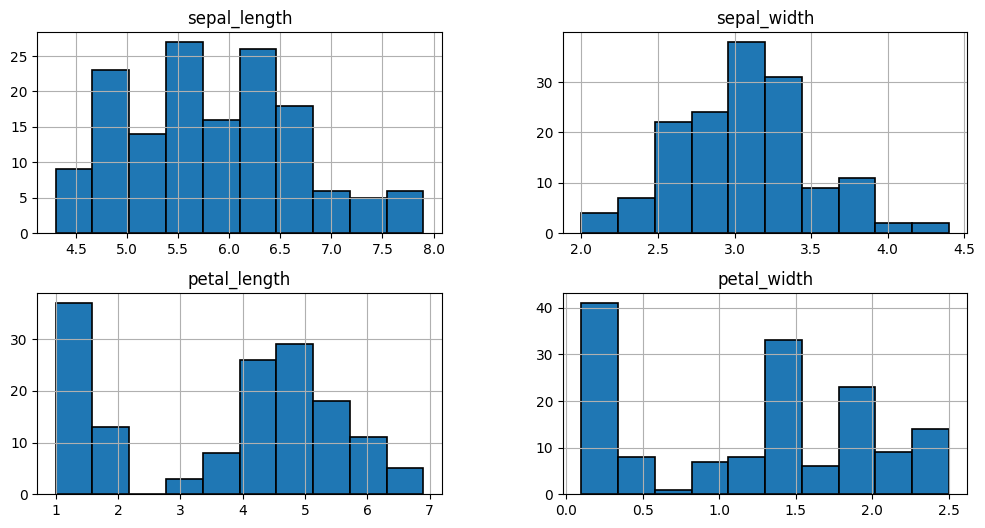

In [54]:
#subplots of all the data histograms
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()


/tmp/ipykernel_13893/1409808759.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_length', data=df, palette=palette1)
/tmp/ipykernel_13893/1409808759.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_width', data=df, palette=palette2)
/tmp/ipykernel_13893/1409808759.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=df, palette=palette3)
/tmp/ipykernel_13893/1409808759.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

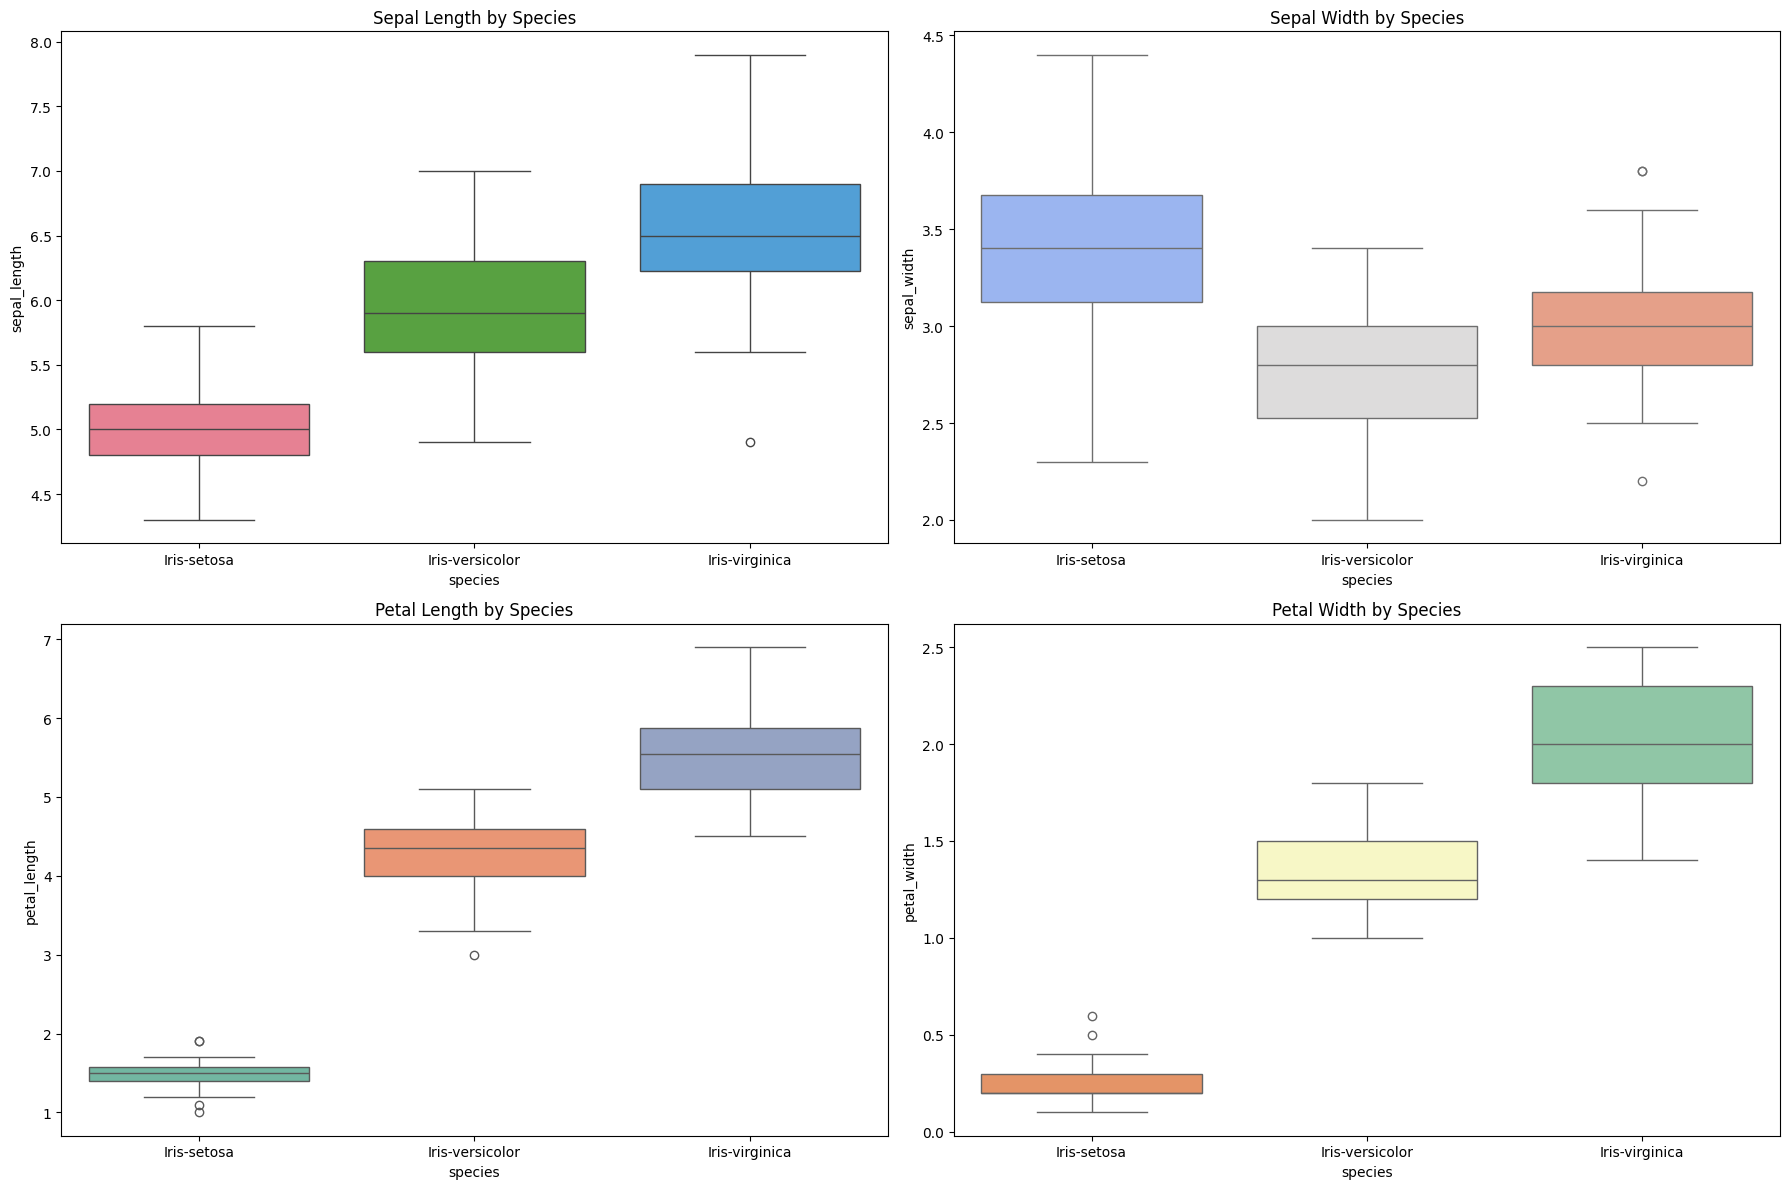

In [55]:
palette1 = sns.color_palette("husl", 3)
palette2 = sns.color_palette("coolwarm", 3)
palette3 = sns.color_palette("Set2", 3)
palette4 = sns.color_palette("Spectral", 3)

# Subplots of boxplots of all the data
plt.figure(figsize=(18,12))  # Increase the figure size for better spacing

# Create subplots
plt.subplot(2,2,1)
sns.boxplot(x='species', y='sepal_length', data=df, palette=palette1)
plt.title('Sepal Length by Species')

plt.subplot(2,2,2)
sns.boxplot(x='species', y='sepal_width', data=df, palette=palette2)
plt.title('Sepal Width by Species')

plt.subplot(2,2,3)
sns.boxplot(x='species', y='petal_length', data=df, palette=palette3)
plt.title('Petal Length by Species')

plt.subplot(2,2,4)
sns.boxplot(x='species', y='petal_width', data=df, palette=palette4)
plt.title('Petal Width by Species')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [56]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### K-Means

In [57]:
# wccs fullform is within cluster sum of squares
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

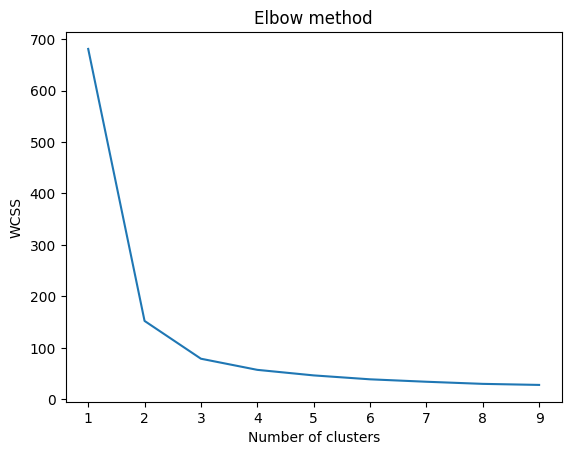

In [58]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [59]:
# creating the k-means classifier with n_clusters being k, the number of clusters for the model
kmeans = KMeans(n_clusters = 3 , 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)
# fitting the model
y_kmeans = kmeans.fit_predict(X)


In [60]:
def plot_data_cluster_output(method, y_clusters, features,
                             output, k_clusters, x_axis, y_axis):
    """
    function plotting the data labeled by clusters and by output
    """
    # plotting the points labeled by the cluster
    # legend
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    colors = iter(cm.rainbow(np.linspace(0, 1, k_clusters)))
    
    for i in range(0,k_clusters):
        ax1.scatter(features.iloc[y_clusters == i, x_axis], features.iloc[y_clusters == i, y_axis], s = 30, color= next(colors), label = 'cluster ' + str(i))
    ax1.legend()
    
    # plotting the centroid
    if method=='kmeans':
        # plotting the centroids of the clusters
        ax1.scatter(kmeans.cluster_centers_[:, x_axis], kmeans.cluster_centers_[:,y_axis], s = 30, c = 'yellow', label = 'centroids')
    
    # title
    ax1.title.set_text(method + " clustering on " + features.columns[x_axis] + " and " + features.columns[y_axis])
    # x label
    ax1.set_xlabel(features.columns[x_axis])
    # y label
    ax1.set_ylabel(features.columns[y_axis])
    
    # preparing legend to get the same colour if the number of clusters is equal to the number of labels
    if len(output.unique())==k_clusters:
        # initialize labels vector
        labels=[None]*3
        
        # reordering labels
        for i in range(0,k_clusters):
            index_label=np.where(np.amax(pd.crosstab(y_kmeans, output).iloc[:,i].values)==pd.crosstab(y_kmeans, output).iloc[:,i].values)[0]
            labels[index_label[0]]=output.unique()[i]
    else:
        labels=output.unique()
    
    plt.figure(2)
    colors = iter(cm.rainbow(np.linspace(0, 1, len(output.unique()))))
    
    # plotting the points labeled by the label
    for i in labels:
        ax2.scatter(features.iloc[output.values == i, x_axis], features.iloc[output.values == i, y_axis], s = 30, color = next(colors), label = i)   
    ax2.legend()
    # title
    ax2.title.set_text("Data labeled on species depending on " + features.columns[x_axis] + " and " + features.columns[y_axis])
    # x label
    ax2.set_xlabel(features.columns[x_axis])
    # y label
    ax2.set_ylabel(features.columns[y_axis])

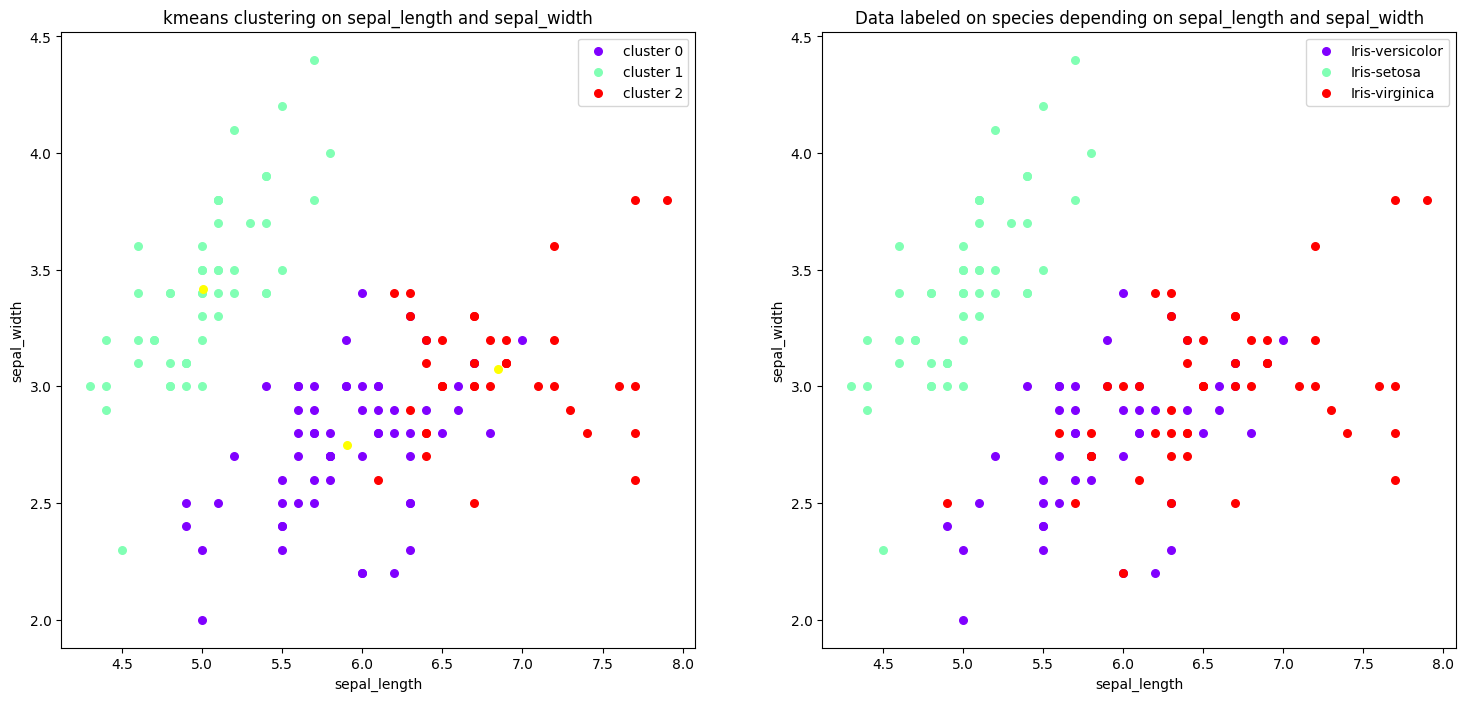

<Figure size 640x480 with 0 Axes>

In [61]:
plot_data_cluster_output('kmeans', y_kmeans, X, y, 3, 0, 1)

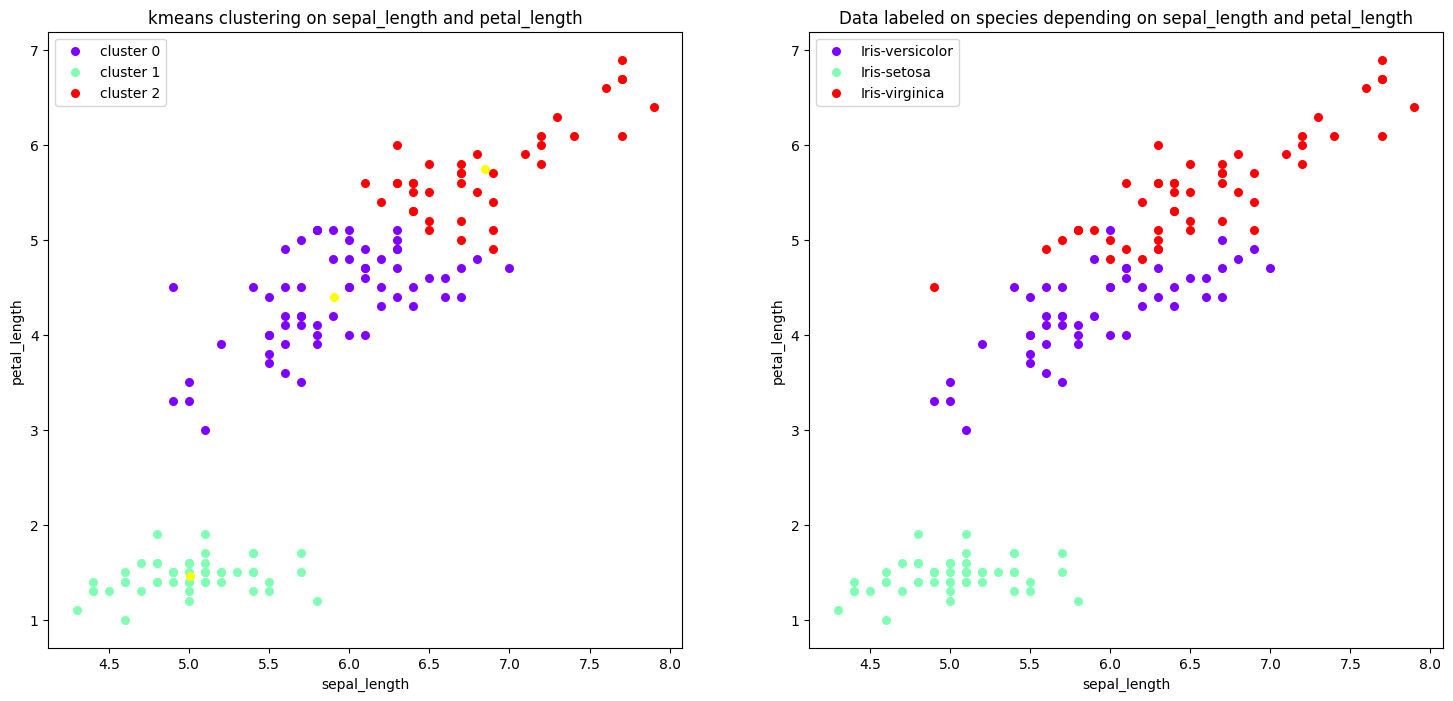

<Figure size 640x480 with 0 Axes>

In [62]:
plot_data_cluster_output('kmeans', y_kmeans, X, y, 3, 0, 2)

In [63]:
pd.crosstab(y_kmeans, y)

species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36


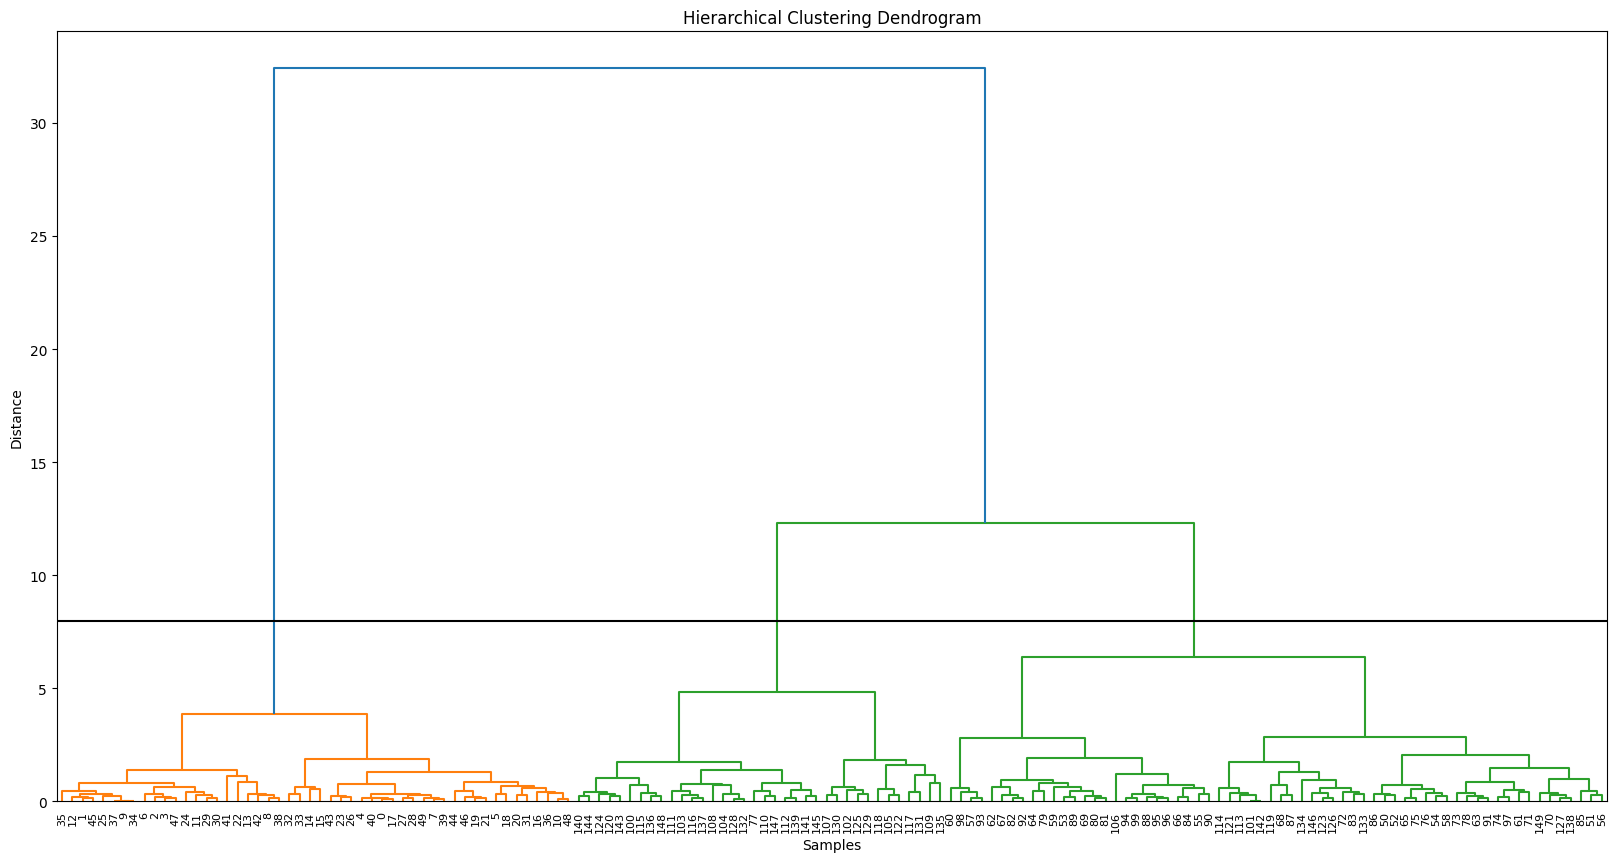

In [64]:
#generate the linkage matrix
Z = linkage(X, 'ward')

# we set the cut off, the level where we decide to cluster the data, we select the distance level where the line does not intercept any node.
# try different levels to understand this concept
max_d = 8               

plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp', 
    p=150,                  # indicates how many final leafs you want to have ( ideally the number of samples)
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()